<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/Hyeon-Tae_Hwang/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install -U kaleido

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,969 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [11]:

!mkdir covid/image

In [1]:
# drive mount
from google.colab import drive
drive.mount('/content/drive')

!mkdir covid
!cd '/content/covid'

!unzip -qq "/content/drive/MyDrive/ai/covid/코로나19.zip" -d '/content/covid' # 압축파일 경로

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
cases = pd.read_csv('/content/covid/서울시 코로나19 확진자 현황.csv')
area = pd.read_csv('/content/covid/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv')

In [26]:
print(cases)

        연번     확진일   환자번호  국적  환자정보   지역     여행력        접촉력  조치사항   상태  \
0     5748  10.21.  25530 NaN   NaN  양천구     NaN   감염경로 조사중   NaN  NaN   
1     5747  10.21.  25528 NaN   NaN  강동구     NaN  강남서초 지인모임   NaN  NaN   
2     5746  10.21.  25525 NaN   NaN  강남구     NaN  기타 확진자 접촉   NaN  NaN   
3     5745  10.21.  25517 NaN   NaN  관악구     NaN   감염경로 조사중   NaN  NaN   
4     5744  10.21.  25504 NaN   NaN  관악구     NaN  기타 확진자 접촉   NaN  NaN   
...    ...     ...    ...  ..   ...  ...     ...        ...   ...  ...   
5743     5   1.31.      9 NaN   NaN  성북구     NaN      #5 접촉   NaN   퇴원   
5744     4   1.30.      7 NaN   NaN  마포구  중국 우한시      해외 접촉   NaN   퇴원   
5745     3   1.30.      6 NaN   NaN  종로구     NaN      #3 접촉   NaN   퇴원   
5746     2   1.30.      5 NaN   NaN  중랑구  중국 우한시      해외 접촉   NaN   퇴원   
5747     1   1.24.      2 NaN   NaN  강서구  중국 우한시      해외 접촉   NaN   퇴원   

              이동경로               등록일               수정일 노출여부          경도  \
0              NaN  2020-10-22 10:58

In [5]:
print(cases.head())
print(cases.shape)
print(cases.columns)

     연번     확진일   환자번호  국적  환자정보   지역  여행력        접촉력  조치사항   상태 이동경로  \
0  5748  10.21.  25530 NaN   NaN  양천구  NaN   감염경로 조사중   NaN  NaN  NaN   
1  5747  10.21.  25528 NaN   NaN  강동구  NaN  강남서초 지인모임   NaN  NaN  NaN   
2  5746  10.21.  25525 NaN   NaN  강남구  NaN  기타 확진자 접촉   NaN  NaN  NaN   
3  5745  10.21.  25517 NaN   NaN  관악구  NaN   감염경로 조사중   NaN  NaN  NaN   
4  5744  10.21.  25504 NaN   NaN  관악구  NaN  기타 확진자 접촉   NaN  NaN  NaN   

                등록일               수정일 노출여부  
0  2020-10-22 10:58  2020-10-22 10:58    Y  
1  2020-10-22 10:58  2020-10-22 10:58    Y  
2  2020-10-22 10:58  2020-10-22 10:58    Y  
3  2020-10-22 10:58  2020-10-22 10:58    Y  
4  2020-10-22 10:58  2020-10-22 10:58    Y  
(5748, 14)
Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')


In [4]:
cases = pd.read_csv('/content/covid/서울시 코로나19 확진자 현황.csv', index_col=False,
                    dtype = {'환자번호':'category', '확진일':'category', '지역':'category', '여행력':'category', '접촉력':'category', '상태':'category' }
                    )

In [20]:
cases.접촉력.value_counts().head(25)

기타 확진자 접촉        818
성북구 사랑제일교회 관련    641
확인 중             586
해외 접촉 추정         415
감염경로 조사중         373
타시도 확진자 접촉       244
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
도봉구 다나병원          68
구로구 콜센터 관련        60
노원구 빛가온교회 관련      46
요양시설 관련           43
양천구 운동시설 관련       43
성북구 체대입시 관련       43
확인중               42
용인시 우리제일교회 관련     41
구로구 교회 관련         41
극단 산 관련           37
서대문구 세브란스병원       37
콜센터직원 접촉          37
강남구 K보건산업         37
수도권 개척교회 관련       37
구로구 아파트 관련        36
강남구 사무실 관련        36
Name: 접촉력, dtype: int64

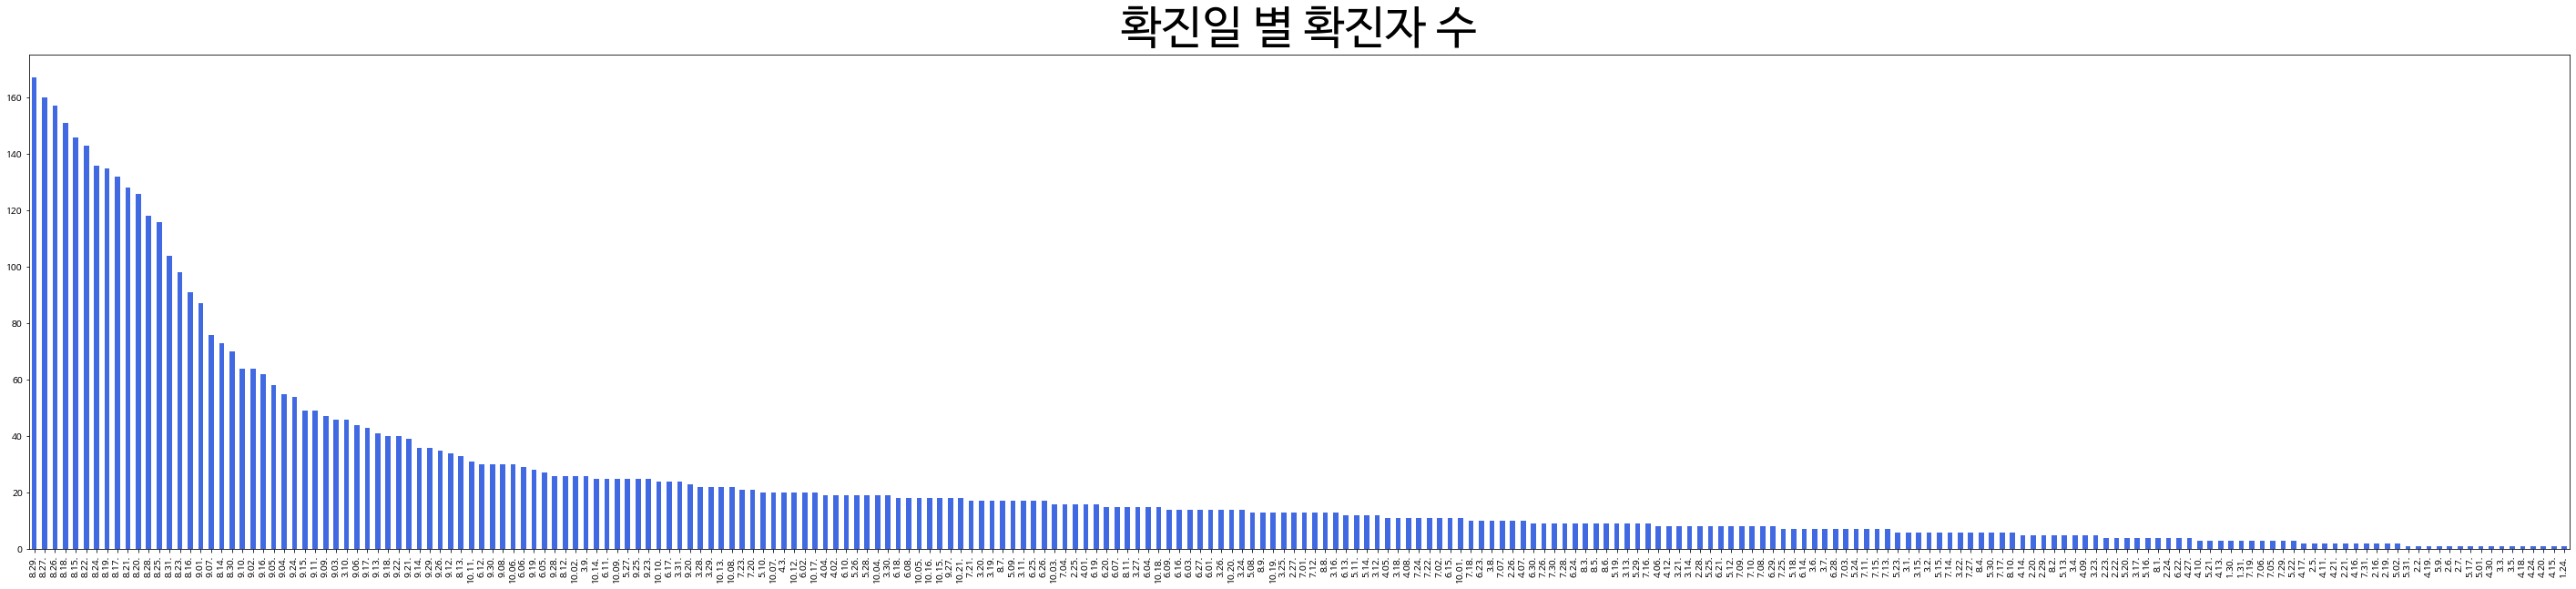

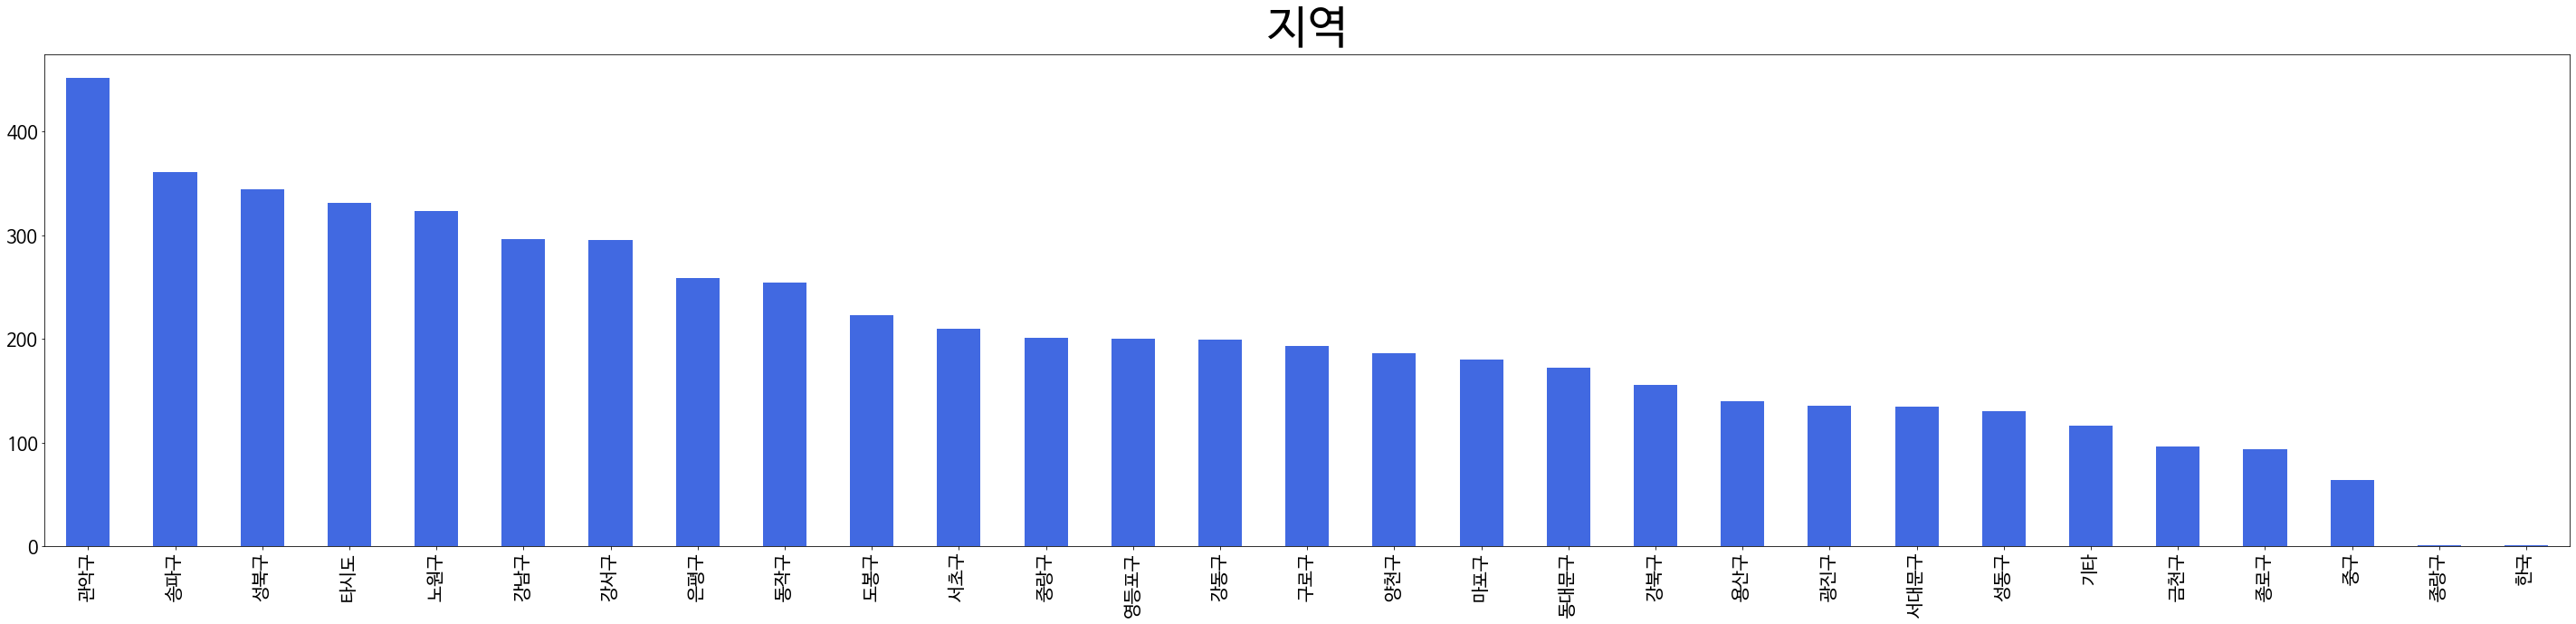

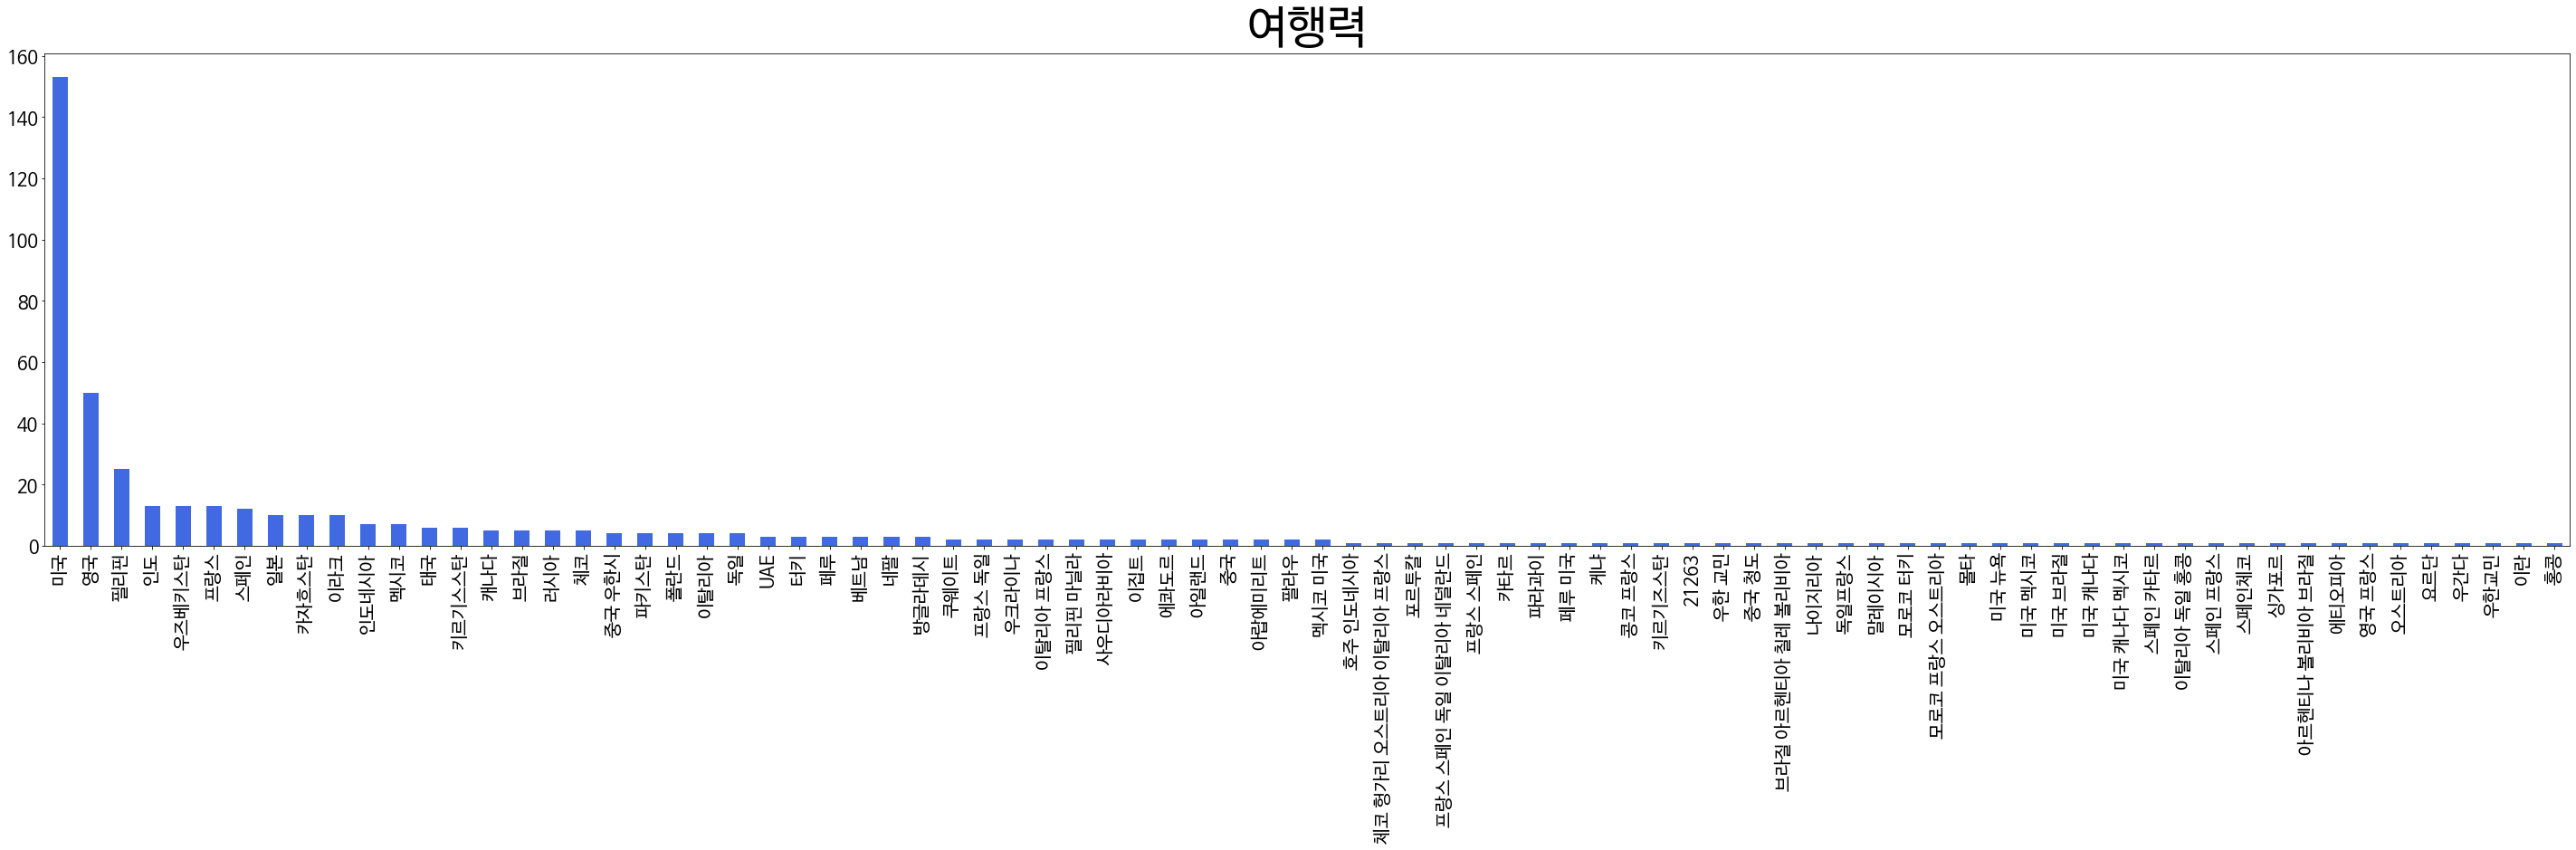

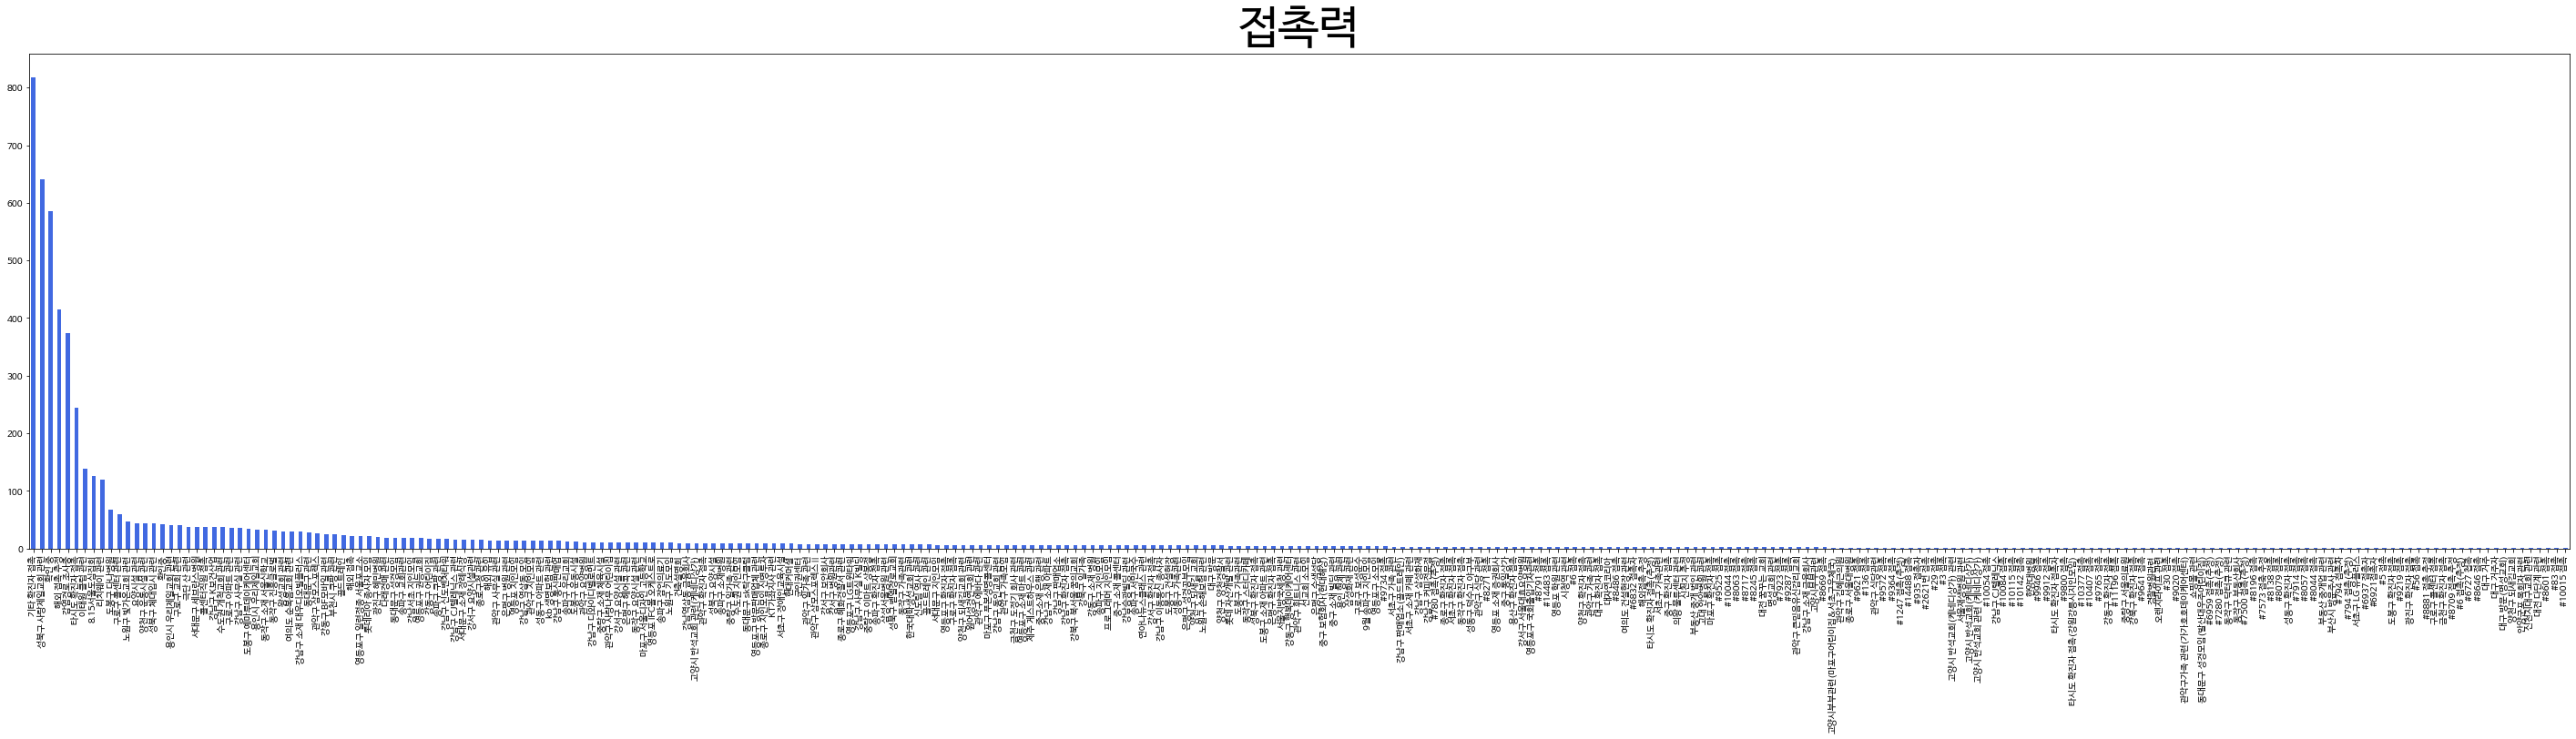

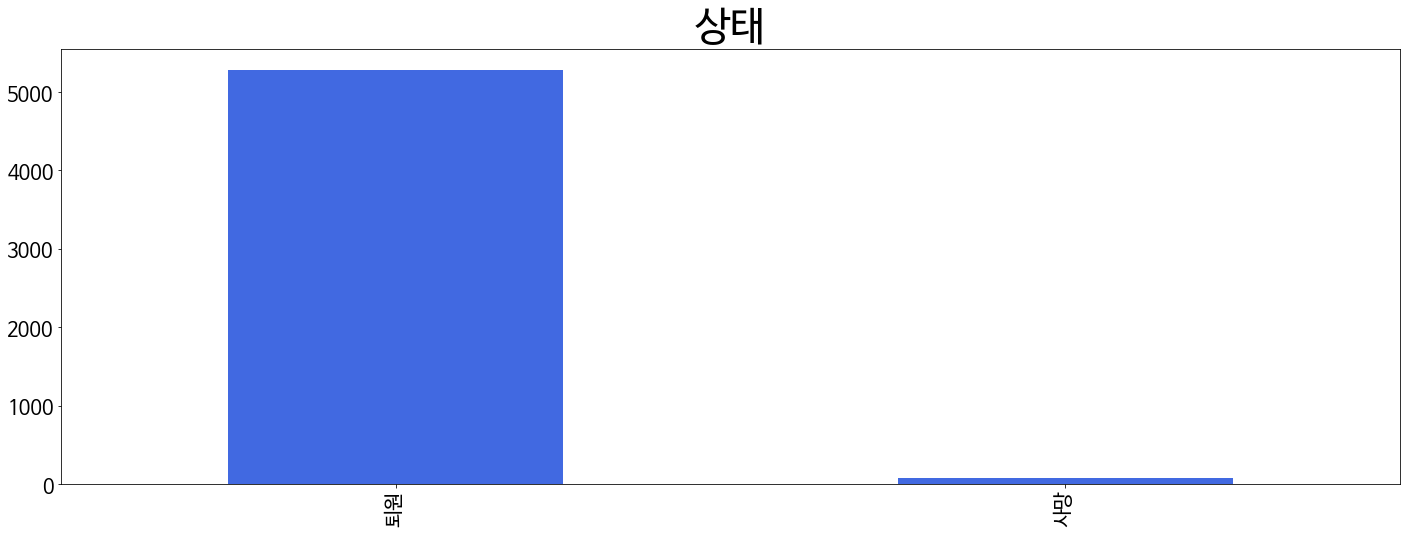

In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

figsize = (50,10)
title_font_size = 50
fontsize1 = 10
fontsize2 = 20
color = 'royalblue'
cases.확진일.value_counts().plot(kind='bar', figsize = figsize, color = color, fontsize= fontsize1)
plt.title('확진일 별 확진자 수', fontsize=title_font_size)
plt.show()

cases.지역.value_counts().plot(kind='bar', figsize = figsize, color = color, fontsize = fontsize2)
plt.title('지역', fontsize=title_font_size)
plt.show()

cases.여행력.value_counts().plot(kind='bar', figsize= figsize, color = color, fontsize = fontsize2)
plt.title('여행력', fontsize=title_font_size)
plt.show()

cases.접촉력.value_counts().plot(kind='bar', figsize = figsize, color = color,fontsize = fontsize1)
plt.title('접촉력', fontsize=title_font_size)
plt.show()

cases.상태.value_counts().plot(kind='bar', figsize = (24,8), color = color,fontsize = fontsize2)
plt.title('상태', fontsize=40)

plt.show()

In [ ]:
cases['여행력'].value_counts()

미국                      153
영국                       50
필리핀                      25
인도                       13
프랑스                      13
                       ... 
프랑스 스페인 독일 이탈리아 네덜란드      1
호주 인도네시아                  1
포르투칼                      1
미국 캐나다 멕시코                1
우한 교민                     1
Name: 여행력, Length: 82, dtype: int64

In [ ]:
cases['여행력'].unique()

numpy.ndarray

In [ ]:
cases['지역'].value_counts()

관악구     452
송파구     361
성북구     344
타시도     331
노원구     323
강남구     296
강서구     295
은평구     259
동작구     254
도봉구     223
서초구     210
중랑구     201
영등포구    200
강동구     199
구로구     193
양천구     186
마포구     180
동대문구    172
강북구     156
용산구     140
광진구     136
서대문구    135
성동구     130
기타      116
금천구      96
종로구      94
중구       64
종랑구       1
한국        1
Name: 지역, dtype: int64

In [ ]:
print(area.head())
print(area.shape)

   순번  시군구코드 시군구명_한글        시군구명_영문  ESRI_PK         위도          경도
0   1  11320     도봉구      Dobong-gu        0  37.665861  127.031767
1   2  11380     은평구   Eunpyeong-gu        1  37.617612  126.922700
2   3  11230    동대문구  Dongdaemun-gu        2  37.583801  127.050700
3   4  11590     동작구     Dongjak-gu        3  37.496504  126.944307
4   5  11545     금천구   Geumcheon-gu        4  37.460097  126.900155
(25, 7)


지도 시각화

In [6]:
import folium
#import json

In [7]:
#geo_path = 
from urllib.request import urlopen
import json

with urlopen('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json') as response:
    geo_json = json.load(response)



In [8]:
#geo_path = '/content/covid/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv'
#geo_json = json.load(open(geo_path, encoding='utf-8-sig'))

def add1(valid):

    loc = area[area['시군구명_한글'] == valid]['경도'].values.tolist()
    if len(loc) == 0:
      return 0
    return loc[0]
    
def add2(valid):
    loc = area[area['시군구명_한글'] == valid]['위도'].values.tolist()
    if len(loc) == 0:
      return 0
    return loc[0]

cases['경도'] = cases.apply(lambda row : add1(row['지역']), axis = 1)

cases['위도'] = cases.apply(lambda row : add2(row['지역']), axis = 1)

In [9]:
df_area = pd.DataFrame(cases.지역.value_counts(dropna=False))


df_area = df_area.reset_index()
df_area.columns = ['장소','확진자수']
df_area

,장소,확진자수
0,관악구,452
1,송파구,361
2,성북구,344
3,타시도,331
4,노원구,323
5,강남구,296
6,강서구,295
7,은평구,259
8,동작구,254
9,도봉구,223


In [12]:
import plotly.express as px
import pandas as pd 

fig = px.choropleth(df_area, geojson=geo_json, locations='장소', color='확진자수',
                           color_continuous_scale="Blues",
                          featureidkey='properties.name'
                          
                          )

fig.update_geos(fitbounds="locations", visible=False)





fig.write_image("/content/covid/image/fig1.png")

fig.show()

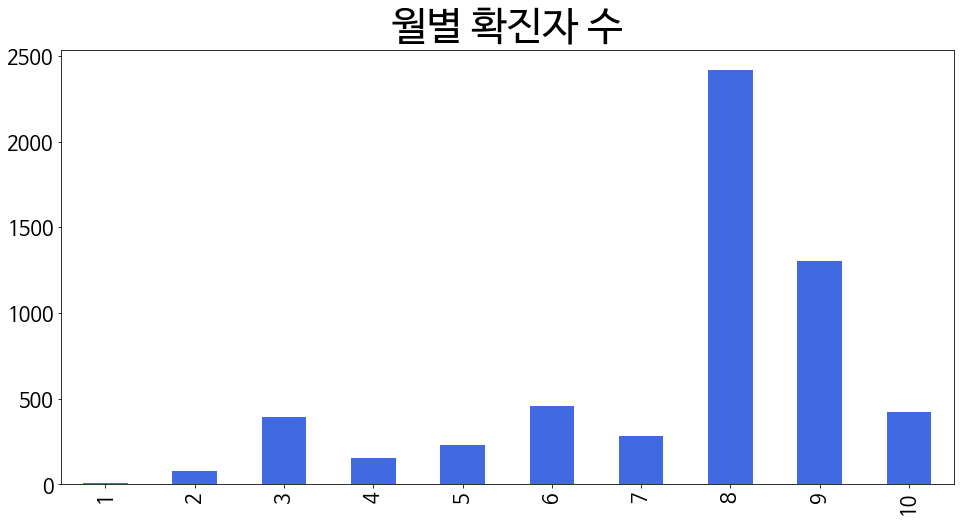

In [14]:
cases['month'] = cases.apply(lambda row : row['확진일'].split('.')[0], axis = 1)
figsize = (16,8)
title_font_size = 40
month_df = cases.month.value_counts()
month_index = cases.month.value_counts().index.tolist()
month_index = map(int,month_index)
month_df.index = month_index
month_df  =month_df.sort_index()
month_df.plot(kind='bar', figsize = figsize, color = 'royalblue', fontsize = 20)
plt.title('월별 확진자 수', fontsize=title_font_size)
plt.show()

In [15]:
class1 = cases['month'].unique().tolist()
class2 = cases['지역'].unique().tolist()

matrix_image = [[0]*len(class1) for _ in range(len(class2))]


for i in range(len(cases.index)):
  get = cases.iloc[i,:]
  loc = class2.index(get['지역'])
  month = class1.index(get['month'])
  matrix_image[loc][month] += 1

image_list = []
for i in range(1,11):
  month = str(i)

  matrix3 = pd.DataFrame(matrix_image)
  matrix3.index = [i for i in class2]
  matrix3.columns = [i for i in class1]
  df_in = pd.DataFrame(matrix3[month])
  df_in = df_in.reset_index()
  df_in.columns = ['장소','확진자수']
  df_in
  fig = px.choropleth(df_in, geojson=geo_json, locations='장소', color='확진자수',
                            color_continuous_scale="Blues",
                            featureidkey='properties.name',
                            title = month + '월'
                            
                            )


  fig.update_geos(fitbounds="locations", visible=False)

  fig.write_image("/content/covid/image/" + "mon" + month + ".png")
  image_list.append("/content/covid/image/" + "mon" + month + ".png")

  fig.show()

Vaccine Target

Prediction of mutable sites in SARS-Cov 2 proteins, epitopes

In [16]:
!git clone https://github.com/GiancarloCroce/DCA_SARS-CoV-2
%cd ./DCA_SARS-CoV-2
#for plotly on google colab
import plotly.io as pio
pio.renderers.default = 'colab'

Cloning into 'DCA_SARS-CoV-2'...
remote: Enumerating objects: 530, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 530 (delta 74), reused 78 (delta 42), pack-reused 415
Receiving objects: 100% (530/530), 94.08 MiB | 22.33 MiB/s, done.
Resolving deltas: 100% (314/314), done.
/content/DCA_SARS-CoV-2


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pandas as pd
import datetime
from sklearn import preprocessing
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go  
from sklearn import metrics
from utils import load_data_dca, plot_roc, plot_dca_IEDB, plot_dca_IEDB_BTcell
from utils import get_IEDB_versions, compute_RF, get_updated_IEDB,load_VOC

DCA mutability score analysis

In [27]:
print(df.columns)

Index(['protein', 'domain', 'position_protein', 'position_domain',
       'aa_Wuhan-Hu-1', 'mutability_score(IND)', 'mutability_score(DCA)',
       'observed_mut_Jul2020', 'observed_mut_Dec2020', 'observed_mut_May2021',
       'observed_mut_Jan2022', 'IEDB_lowerbound', 'IEDB_upperbound',
       'subj_tested', 'subj_responded', 'IEDB_response_frequency',
       'size_scatter'],
      dtype='object')


In [18]:
prot = "Spike"
dom = "bCoV_S1_RBD"

df = load_data_dca(path_data = "./data/data_dca_proteome.csv", protein = prot, domain = dom)
print(df)

     protein       domain  position_protein  position_domain aa_Wuhan-Hu-1  \
7448   Spike  bCoV_S1_RBD               349              1.0             S   
7449   Spike  bCoV_S1_RBD               350              2.0             V   
7450   Spike  bCoV_S1_RBD               351              3.0             Y   
7451   Spike  bCoV_S1_RBD               352              4.0             A   
7452   Spike  bCoV_S1_RBD               353              5.0             W   
...      ...          ...               ...              ...           ...   
7621   Spike  bCoV_S1_RBD               522            174.0             A   
7622   Spike  bCoV_S1_RBD               523            175.0             T   
7623   Spike  bCoV_S1_RBD               524            176.0             V   
7624   Spike  bCoV_S1_RBD               525            177.0             C   
7625   Spike  bCoV_S1_RBD               526            178.0             G   

      mutability_score(IND)  mutability_score(DCA)  observed_mu

In [ ]:
## data = ~Oct , 2020


RBD of Spike protein

GISAID data from Jan 2020 to observed_mut_May2021, protein=Spike, domain=bCoV_S1_RBD
- 65 sites are mutable (1)
     a site if considered as *mutable* if >= 16 mutations are observed in GISAID
- 113 sites are constrained (0)
     a site if considered as *constrained* if < 16 mutations are observed in GISAID


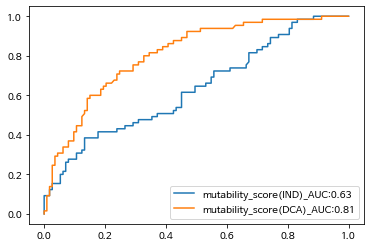

In [19]:
## ROC DCA vs. IND model, Fig.2D

# define constrained and mutable sites
N_mut = 16
constrained = range(0,N_mut)
mutable = range(N_mut,1000000) #1000000 a random big number 

# GISAID data (from Jan2021 to May2021)
GISAID = 'observed_mut_May2021'

list_score = ['mutability_score(IND)', 'mutability_score(DCA)']
plot_roc(constrained, mutable, GISAID, list_score, df)


### print some info
num_contrained = np.sum(df[GISAID].isin(constrained))
num_mutable = np.sum(df[GISAID].isin(mutable))


print("GISAID data from Jan 2020 to {0}, protein={1}, domain={2}".format(GISAID,prot, dom))
print("- {0} sites are mutable (1)".format(num_mutable))
print('     a site if considered as *mutable* if >= '+str(N_mut) + ' mutations are observed in GISAID')
print("- {0} sites are constrained (0)".format(num_contrained))
print('     a site if considered as *constrained* if < '+str(N_mut) + ' mutations are observed in GISAID')

In [21]:
'''
#https://www.who.int/publications/m/item/weekly-epidemiological-update-on-covid-19---18-may-2021
6 SARS-CoV-2 variants = variants of interest (VOI) 
4 as variants of concern (VOC). 

Within the RBD domain, 417, 452, 477, 478, 483, 484, 501 mutation
'''

prot = "Spike"
dom = "bCoV_S1_RBD"
score = 'mutability_score(DCA)'

#positions mutated in VOI/VOC (as of May 2021)
list_pos_mutated_VOI_VOC = [417, 452, 477, 478, 483, 484,  501] #red points

df = load_data_dca(path_data = "./data/data_dca_iedb_RDB_domain.csv", protein = prot, domain = dom)
#print(df)
plot_dca_IEDB(df, score, list_pos = list_pos_mutated_VOI_VOC)

list mutated positions = [417 452 477 478 483 484 501]


0

The https://cov-lineages.org/ and https://covariants.org/ websites collect potentially dangerous SARS-CoV-2 variants. 

In [22]:
#list VOC (Dec2021)
df_VOC = load_VOC(path_dir_VOC = "./data/VOC", rm_deletion = True, verbose = False)
print(df_VOC)

        pango      who mutation_type   protein mutation  position
0   B.1.617.2    Delta            aa     Spike     T19R        19
1   B.1.617.2    Delta            aa     Spike    L452R       452
2   B.1.617.2    Delta            aa     Spike    T478K       478
3   B.1.617.2    Delta            aa     Spike    P681R       681
4   B.1.617.2    Delta            aa     Spike    D950N       950
..        ...      ...           ...       ...      ...       ...
81  B.1.1.529  Omicron            aa     Spike    N969K       969
82  B.1.1.529  Omicron            aa  Envelope      T9I         9
83  B.1.1.529  Omicron            aa  Membrane      D3G         3
84  B.1.1.529  Omicron            aa  Membrane     Q19E        19
85  B.1.1.529  Omicron            aa  Membrane     A63T        63

[86 rows x 6 columns]


In [23]:
prot = "Spike"
df_VOC_prot = df_VOC.loc[df_VOC['protein'] ==prot] 
print(df_VOC_prot)
list_pos_mutated = df_VOC_prot['position'].values
print("mutated sites:", list_pos_mutated)

        pango      who mutation_type protein mutation  position
0   B.1.617.2    Delta            aa   Spike     T19R        19
1   B.1.617.2    Delta            aa   Spike    L452R       452
2   B.1.617.2    Delta            aa   Spike    T478K       478
3   B.1.617.2    Delta            aa   Spike    P681R       681
4   B.1.617.2    Delta            aa   Spike    D950N       950
15    B.1.1.7    Alpha            aa   Spike    N501Y       501
16    B.1.1.7    Alpha            aa   Spike    A570D       570
17    B.1.1.7    Alpha            aa   Spike    P681H       681
18    B.1.1.7    Alpha            aa   Spike    T716I       716
19    B.1.1.7    Alpha            aa   Spike    S982A       982
20    B.1.1.7    Alpha            aa   Spike   D1118H      1118
28        P.1    Gamma            aa   Spike     L18F        18
29        P.1    Gamma            aa   Spike     T20N        20
30        P.1    Gamma            aa   Spike     P26S        26
31        P.1    Gamma            aa   S

In [24]:
'''
DCA mutability score vs. the IEDB response frequency for the  Receptor Binding Domain of the Spike Protein 
highlighting position mutated in Variants of Concerns (list_pos_mutated)
'''

score = 'mutability_score(DCA)'
dom = "bCoV_S1_RBD"

print("DCA mutability predictions vs. IEDB response frequency data for the *** {0} domain of the {1} protein ***".format(dom,prot))  

df = load_data_dca(path_data = "./data/data_dca_proteome.csv", protein = prot, domain = dom)

#get IEDB available versions:
path_IEDB_updated_data = "./data/IEDB_updated_data/{0}".format(prot)
list_IEDB_versions =  get_IEDB_versions(path_IEDB_epitope_data = path_IEDB_updated_data )

IEDB_ver = '12Jun2022'
df = get_updated_IEDB(df, IEDB_ver, path_IEDB_updated_data)

plot_dca_IEDB(df, score, list_pos = list_pos_mutated)
#Try changing the IEDB version (e.g. 30Apr2021, 29Aug2021 and 05Dec2021) to get an idea of how fast immunological data are accumulating!

DCA mutability predictions vs. IEDB response frequency data for the *** bCoV_S1_RBD domain of the Spike protein ***
IEDB available versions: ['30Apr2021', '16May2021', '04Jul2021', '11Jul2021', '28Jul2021', '01Aug2021', '22Aug2021', '29Aug2021', '05Sep2021', '12Sep2021', '26Sep2021', '03Oct2021', '10Oct2021', '17Oct2021', '24Oct2021', '31Oct2021', '08Nov2021', '21Nov2021', '05Dec2021', '26Dec2021', '09Jan2022', '23Jan2022', '06Feb2022', '06Mar2022', '24Apr2022', '12Jun2022', '17Jul2022', '21Aug2022', '25Sep2022', '27Nov2022']
Selecting *** IEDB 12Jun2022 version ***
list mutated positions = [371 373 417 440 446 452 477 478 484 493 496 498 501]


0

In [25]:
# The same scatterplot, but considering each VOC separately:

prot = 'Spike'
dom = "bCoV_S1_RBD"
score = 'mutability_score(DCA)'
df = load_data_dca(path_data = "./data/data_dca_proteome.csv", protein = prot, domain = dom)

#get IEDB available versions:
path_IEDB_updated_data = "./data/IEDB_updated_data/{0}".format(prot)
list_IEDB_versions =  get_IEDB_versions(path_IEDB_epitope_data = path_IEDB_updated_data )

IEDB_ver = '12Jun2022'
df = get_updated_IEDB(df, IEDB_ver, path_IEDB_updated_data)

#add VOC red dot
df_VOC_prot = df_VOC.loc[df_VOC['protein'] ==prot] 

for name_VOC, df_one_VOC in df_VOC_prot.groupby(by = ['pango', 'who']):
    print("######################################################################")
    print(name_VOC)
    df_one_VOC['position']
    list_pos_mutated_VOC = df_one_VOC['position'].values
    plot_dca_IEDB(df, score, list_pos = list_pos_mutated_VOC)

IEDB available versions: ['30Apr2021', '16May2021', '04Jul2021', '11Jul2021', '28Jul2021', '01Aug2021', '22Aug2021', '29Aug2021', '05Sep2021', '12Sep2021', '26Sep2021', '03Oct2021', '10Oct2021', '17Oct2021', '24Oct2021', '31Oct2021', '08Nov2021', '21Nov2021', '05Dec2021', '26Dec2021', '09Jan2022', '23Jan2022', '06Feb2022', '06Mar2022', '24Apr2022', '12Jun2022', '17Jul2022', '21Aug2022', '25Sep2022', '27Nov2022']
Selecting *** IEDB 12Jun2022 version ***
######################################################################
('B.1.1.529', 'Omicron')
list mutated positions = [371 373 417 440 446 477 478 484 493 496 498 501]


######################################################################
('B.1.1.7', 'Alpha')
list mutated positions = [501]


######################################################################
('B.1.351', 'Beta')
list mutated positions = [417 484 501]


######################################################################
('B.1.617.2', 'Delta')
list mutated positions = [452 478]


######################################################################
('P.1', 'Gamma')
list mutated positions = [417 484 501]
